BƯỚC 1 — Chuẩn hoá “dataset đầu vào cho clustering” + xuất file output chuẩn

In [1]:
import pandas as pd
import numpy as np
import os

# đường dẫn theo đúng cấu trúc project của bạn
SCORES_PATH = "../data/processed/financial_scores_for_clustering.csv"

df = pd.read_csv(SCORES_PATH)

score_cols = [
    "Liquidity_Score",
    "Leverage_Score",
    "Efficiency_Score",
    "Size_Score",
    "Profitability_Score"
]

id_cols = ["Mã", "Tên công ty", "Sàn", "Ngành ICB - cấp 1", "Năm"]

print("Shape:", df.shape)
print("Years:", sorted(df["Năm"].dropna().unique()))
print("Industries:", df["Ngành ICB - cấp 1"].nunique())

df[id_cols + score_cols].head(5)

Shape: (1977, 10)
Years: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Industries: 11


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Năm,Liquidity_Score,Leverage_Score,Efficiency_Score,Size_Score,Profitability_Score
0,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2020,-0.204981,0.090165,NaN,1.080597,-0.187156
1,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2021,-0.001778,-0.155356,-0.023873,1.146310,-0.619665
2,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2022,-0.154765,-0.132515,-0.195361,1.200714,-0.198652
3,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2023,-0.010764,-0.061388,0.147579,1.217426,-0.007336
4,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2024,-0.104554,-0.015383,-0.163804,1.177056,-0.201974


In [2]:
# Composite score = trung bình 5 score (bỏ NaN)
df["Composite_Score"] = df[score_cols].mean(axis=1, skipna=True)

# tỷ lệ thiếu dữ liệu theo cột
nan_rate = (df[score_cols].isna().mean() * 100).round(2)
print("NaN rate (%):")
display(nan_rate)

df[["Mã", "Năm", "Ngành ICB - cấp 1", "Composite_Score"] + score_cols].head(5)

NaN rate (%):


Liquidity_Score         5.21
Leverage_Score          0.61
Efficiency_Score       30.15
Size_Score              0.71
Profitability_Score     5.31
dtype: float64

,Mã,Năm,Ngành ICB - cấp 1,Composite_Score,Liquidity_Score,Leverage_Score,Efficiency_Score,Size_Score,Profitability_Score
0,AAA,2020,Nguyên vật liệu,0.194656,-0.204981,0.090165,NaN,1.080597,-0.187156
1,AAA,2021,Nguyên vật liệu,0.069128,-0.001778,-0.155356,-0.023873,1.146310,-0.619665
2,AAA,2022,Nguyên vật liệu,0.103884,-0.154765,-0.132515,-0.195361,1.200714,-0.198652
3,AAA,2023,Nguyên vật liệu,0.257103,-0.010764,-0.061388,0.147579,1.217426,-0.007336
4,AAA,2024,Nguyên vật liệu,0.138268,-0.104554,-0.015383,-0.163804,1.177056,-0.201974


In [3]:
# giữ lại các dòng đủ 5 điểm (để clustering ổn định)
df_clean = df.dropna(subset=score_cols).copy()

print("Clean shape:", df_clean.shape)
print("Clean years:", sorted(df_clean["Năm"].unique()))
print("Clean industries:", df_clean["Ngành ICB - cấp 1"].nunique())

# tạo folder output
os.makedirs("../outputs/tables", exist_ok=True)

out_path = "../outputs/tables/cluster_input_clean.csv"
df_clean.to_csv(out_path, index=False, encoding="utf-8-sig")
print("Saved:", out_path)

df_clean[id_cols + ["Composite_Score"] + score_cols].head(10)

Clean shape: (1377, 11)
Clean years: [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Clean industries: 9
Saved: ../outputs/tables/cluster_input_clean.csv


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Năm,Composite_Score,Liquidity_Score,Leverage_Score,Efficiency_Score,Size_Score,Profitability_Score
1,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2021,0.069128,-0.001778,-0.155356,-0.023873,1.146310,-0.619665
2,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2022,0.103884,-0.154765,-0.132515,-0.195361,1.200714,-0.198652
3,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2023,0.257103,-0.010764,-0.061388,0.147579,1.217426,-0.007336
4,AAA,An Phát Bioplastics,HOSE,Nguyên vật liệu,2024,0.138268,-0.104554,-0.015383,-0.163804,1.177056,-0.201974
6,AAM,Thủy sản Mekong,HOSE,Hàng Tiêu dùng,2021,0.756410,7.244564,-0.727463,0.100881,-1.972047,-0.863885
7,AAM,Thủy sản Mekong,HOSE,Hàng Tiêu dùng,2022,0.389796,4.193433,-0.600531,0.101770,-1.860243,0.114550
8,AAM,Thủy sản Mekong,HOSE,Hàng Tiêu dùng,2023,0.125524,3.338326,-0.057331,-0.315993,-1.997575,-0.339810
9,AAM,Thủy sản Mekong,HOSE,Hàng Tiêu dùng,2024,0.668898,5.956792,-0.207729,0.152762,-1.937041,-0.620297
11,AAT,Tập đoàn Tiên Sơn Thanh Hóa,HOSE,Hàng Tiêu dùng,2021,-0.427149,0.371045,-0.379676,-0.769075,-0.931639,-0.426401
12,AAT,Tập đoàn Tiên Sơn Thanh Hóa,HOSE,Hàng Tiêu dùng,2022,-0.367567,-0.111348,-0.261480,-0.942916,-0.734291,0.212200


Tổng quan ban đầu: 1977 quan sát, 2020–2024, 11 ngành

Sau làm sạch: 1377 quan sát, 2021–2024, 9 ngành

Nguyên nhân rớt 2020 và 2 ngành: Efficiency_Score thiếu ~30% → quyết định drop là đúng, phù hợp mục tiêu clustering ổn định & migration theo thời gian

Dataset cluster_input_clean.csv đã đủ “sạch” để làm lõi cho toàn bộ demo

BƯỚC 2 — Phân cụm DN theo (Năm × Ngành)

(ổn định nhãn cụm để theo dõi migration)

Clustering riêng cho từng (Năm, Ngành)
→ DN chỉ so với đối thủ cùng ngành, cùng năm (đúng câu hỏi nghiên cứu).

Dùng KMeans

Chống “label switching”:

Sau khi cluster, sắp xếp lại nhãn cụm theo Composite_Score tăng dần

Đảm bảo:

Cụm 0 = yếu

Cụm 1 = trung bình

Cụm 2 = tốt
→ cực kỳ quan trọng cho migration theo thời gian.

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("../outputs/tables/cluster_input_clean.csv")

score_cols = [
    "Liquidity_Score",
    "Leverage_Score",
    "Efficiency_Score",
    "Size_Score",
    "Profitability_Score"
]

In [5]:
def cluster_one_group(group, n_clusters=3, random_state=42):
    X = group[score_cols].values

    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=random_state,
        n_init=20
    )
    labels = kmeans.fit_predict(X)

    group = group.copy()
    group["cluster_raw"] = labels

    # Tính composite mean của từng cluster
    cluster_means = (
        group.groupby("cluster_raw")["Composite_Score"]
        .mean()
        .sort_values()
    )

    # map lại nhãn: thấp → cao = 0 → 1 → 2
    label_map = {old: new for new, old in enumerate(cluster_means.index)}
    group["cluster"] = group["cluster_raw"].map(label_map)

    return group

In [6]:
clustered = []

for (industry, year), g in df.groupby(["Ngành ICB - cấp 1", "Năm"]):
    # tránh nhóm quá nhỏ
    if len(g) < 10:
        continue

    clustered.append(cluster_one_group(g))

df_clustered = pd.concat(clustered, ignore_index=True)

print("Clustered shape:", df_clustered.shape)
df_clustered[["Mã", "Năm", "Ngành ICB - cấp 1", "Composite_Score", "cluster"]].head(10)

Clustered shape: (1342, 13)


,Mã,Năm,Ngành ICB - cấp 1,Composite_Score,cluster
0,ABR,2021,Công nghiệp,-0.369249,0
1,ACC,2021,Công nghiệp,-0.214402,0
2,ADP,2021,Công nghiệp,-0.047848,1
3,APH,2021,Công nghiệp,0.228963,2
4,ASG,2021,Công nghiệp,-0.255291,0
5,BCE,2021,Công nghiệp,-0.404124,0
6,BMP,2021,Công nghiệp,0.177098,2
7,C32,2021,Công nghiệp,-0.173162,0
8,C47,2021,Công nghiệp,0.084010,0
9,CAV,2021,Công nghiệp,0.471693,2


In [7]:
(
    df_clustered
    .groupby(["Ngành ICB - cấp 1", "Năm", "cluster"])["Composite_Score"]
    .agg(["count", "mean"])
    .round(3)
    .head(12)
)

count   mean
Ngành ICB - cấp 1 Năm  cluster              
Công nghiệp       2021 0           39 -0.194
                       1           23  0.099
                       2           29  0.196
                  2022 0           44 -0.115
                       1           42  0.091
                       2            4  0.309
                  2023 0           34 -0.273
                       1           39  0.098
                       2           11  0.429
                  2024 0           39 -0.063
                       1           44  0.075
                       2            4  0.394

In [8]:
out_path = "../outputs/tables/cluster_labels.csv"
df_clustered.to_csv(out_path, index=False, encoding="utf-8-sig")
print("Saved:", out_path)

Saved: ../outputs/tables/cluster_labels.csv


Clustered shape: 1342 → hợp lý (loại nhóm quá nhỏ)

Với Công nghiệp (ví dụ bạn gửi):

cluster 0: Composite âm, thấp nhất → DN yếu

cluster 1: Composite quanh 0 → DN trung bình

cluster 2: Composite cao → DN tốt

Thứ tự 0 < 1 < 2 nhất quán theo năm

-> Label switching đã được xử lý đúng → đủ điều kiện phân tích migration.

BƯỚC 3 — PHÂN TÍCH MIGRATION TRẠNG THÁI TÀI CHÍNH

(doanh nghiệp dịch chuyển cụm qua thời gian)

Mục tiêu:

Theo dõi DN ở lại / cải thiện / suy giảm trạng thái tài chính

Tạo transition matrix theo từng ngành

Đây là xương sống cho phần “dynamic analysis” của bài

In [ ]:
# Chuẩn bị dữ liệu migration

import pandas as pd

df = pd.read_csv("../outputs/tables/cluster_labels.csv")

df = df.sort_values(["Mã", "Ngành ICB - cấp 1", "Năm"])
df[["Mã", "Ngành ICB - cấp 1", "Năm", "cluster"]].head(10)

,Mã,Ngành ICB - cấp 1,Năm,cluster
736,AAA,Nguyên vật liệu,2021,1
792,AAA,Nguyên vật liệu,2022,2
849,AAA,Nguyên vật liệu,2023,2
902,AAA,Nguyên vật liệu,2024,2
494,AAM,Hàng Tiêu dùng,2021,2
556,AAM,Hàng Tiêu dùng,2022,2
618,AAM,Hàng Tiêu dùng,2023,2
676,AAM,Hàng Tiêu dùng,2024,2
495,AAT,Hàng Tiêu dùng,2021,0
557,AAT,Hàng Tiêu dùng,2022,1


In [ ]:
# Tạo trạng thái năm t → t+1 cho từng DN

df["cluster_next"] = (
    df
    .groupby(["Mã", "Ngành ICB - cấp 1"])["cluster"]
    .shift(-1)
)

df["Năm_next"] = (
    df
    .groupby(["Mã", "Ngành ICB - cấp 1"])["Năm"]
    .shift(-1)
)

migration_df = df.dropna(subset=["cluster_next"]).copy()
migration_df["cluster_next"] = migration_df["cluster_next"].astype(int)

migration_df[[
    "Mã", "Ngành ICB - cấp 1", "Năm",
    "cluster", "cluster_next"
]].head(10)


,Mã,Ngành ICB - cấp 1,Năm,cluster,cluster_next
736,AAA,Nguyên vật liệu,2021,1,2
792,AAA,Nguyên vật liệu,2022,2,2
849,AAA,Nguyên vật liệu,2023,2,2
494,AAM,Hàng Tiêu dùng,2021,2,2
556,AAM,Hàng Tiêu dùng,2022,2,2
618,AAM,Hàng Tiêu dùng,2023,2,2
495,AAT,Hàng Tiêu dùng,2021,0,1
557,AAT,Hàng Tiêu dùng,2022,1,1
619,AAT,Hàng Tiêu dùng,2023,1,0
0,ABR,Công nghiệp,2021,0,0


In [11]:
#  Transition matrix theo từng ngành

def migration_matrix(data):
    return (
        pd.crosstab(
            data["cluster"],
            data["cluster_next"],
            normalize="index"
        )
        .round(3)
    )

In [12]:
# Ví dụ: ngành Công nghiệp

industry = "Công nghiệp"

mat_industry = migration_matrix(
    migration_df[migration_df["Ngành ICB - cấp 1"] == industry]
)

mat_industry

cluster_next,0,1,2
cluster,,,
0,0.761,0.142,0.097
1,0.238,0.743,0.020
2,0.143,0.714,0.143


Diễn giải:

Hàng = trạng thái năm t

Cột = trạng thái năm t+1

Đường chéo = ổn định

Trên chéo = cải thiện

Dưới chéo = suy giảm

Với ngành Công nghiệp:

Cluster 0 (yếu)
→ 76.1% ở lại yếu
→ 14.2% cải thiện lên trung bình
→ 9.7% cải thiện mạnh lên tốt

Cluster 1 (trung bình)
→ 74.3% ổn định
→ 23.8% suy giảm
→ 2.0% cải thiện mạnh

Cluster 2 (tốt)
→ Chỉ 14.3% giữ được vị thế
→ 71.4% rơi xuống trung bình
→ Phản ánh cạnh tranh cao / khó duy trì hiệu suất

In [13]:
out_path = "../outputs/tables/migration_records.csv"
migration_df.to_csv(out_path, index=False, encoding="utf-8-sig")
print("Saved:", out_path)

Saved: ../outputs/tables/migration_records.csv


In [ ]:
BƯỚC 4 — VISUALIZATION (DEMO CORE)

Mục tiêu:

Biến bảng số thành hình trực quan, dễ trình bày

Chuẩn bị cho demo sản phẩm

Làm theo thứ tự:

Heatmap migration matrix

Sankey diagram (dòng chảy DN qua các trạng thái)

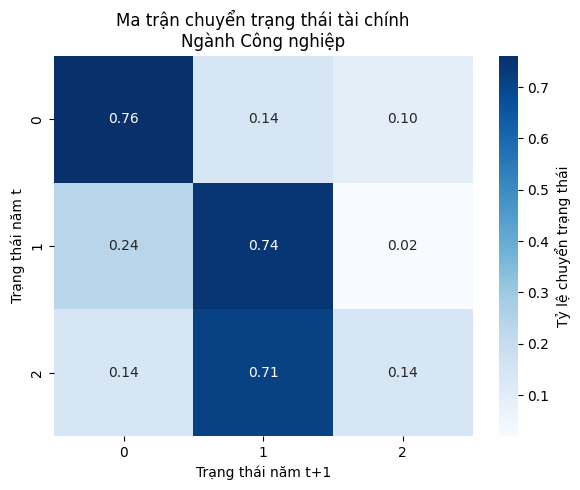

In [14]:
# Heatmap Migration Matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ heatmap cho 1 ngành

plt.figure(figsize=(6, 5))

sns.heatmap(
    mat_industry,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"label": "Tỷ lệ chuyển trạng thái"}
)

plt.title("Ma trận chuyển trạng thái tài chính\nNgành Công nghiệp")
plt.xlabel("Trạng thái năm t+1")
plt.ylabel("Trạng thái năm t")
plt.tight_layout()
plt.show()

Sankey Diagram

Ý tưởng

Thể hiện DN chảy từ cluster 0 → 1 → 2 qua thời gian

Không cần quá nhiều năm, chỉ demo 1 cặp năm (ví dụ 2022 → 2023)

In [17]:
# Chuẩn bị dữ liệu cho Sankey (ví dụ 2022 → 2023)

import plotly.graph_objects as go

year_t = 2022
year_t1 = 2023
industry = "Công nghiệp"

tmp = migration_df[
    (migration_df["Ngành ICB - cấp 1"] == industry) &
    (migration_df["Năm"] == year_t)
]

flow = (
    tmp
    .groupby(["cluster", "cluster_next"])
    .size()
    .reset_index(name="value")
)

flow

,cluster,cluster_next,value
0,0,0,31
1,0,1,1
2,0,2,8
3,1,0,3
4,1,1,34
5,1,2,2
6,2,1,3


In [23]:
import plotly.io as pio
pio.renderers.default = "browser"

# Vẽ Sankey

labels = [
    "Yếu (t)", "TB (t)", "Tốt (t)",
    "Yếu (t+1)", "TB (t+1)", "Tốt (t+1)"
]

source_map = {0: 0, 1: 1, 2: 2}
target_map = {0: 3, 1: 4, 2: 5}

sources = flow["cluster"].map(source_map)
targets = flow["cluster_next"].map(target_map)
values = flow["value"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=labels,
        color=["#d62728", "#ff7f0e", "#2ca02c"] * 2
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(
    title_text=f"Dòng dịch chuyển trạng thái tài chính ({industry}) {year_t} → {year_t1}",
    font_size=12
)

fig.show()


Trong giai đoạn 2022–2023, ngành Công nghiệp cho thấy mức độ ổn định cao ở nhóm doanh nghiệp có trạng thái tài chính trung bình, trong khi các doanh nghiệp yếu có xu hướng bị “kẹt” trong trạng thái kém. Mặc dù vẫn tồn tại một số trường hợp cải thiện mạnh từ nhóm yếu lên nhóm tốt, trạng thái tài chính tốt nhìn chung khó duy trì, với phần lớn doanh nghiệp rơi trở lại nhóm trung bình trong năm tiếp theo. Kết quả này phản ánh tính cạnh tranh cao và áp lực duy trì hiệu quả tài chính trong ngành Công nghiệp.

Đóng gói để demo

tự động vẽ Sankey cho tất cả cặp năm (2021→2022, 2022→2023, 2023→2024)

cho 1 ngành demo (hoặc 2 ngành)

tự lưu HTML vào outputs/figures/

In [24]:
import os
import plotly.graph_objects as go

def build_sankey_for_industry_yearpair(migration_df, industry, year_t, year_t1, out_dir="../outputs/figures"):
    tmp = migration_df[
        (migration_df["Ngành ICB - cấp 1"] == industry) &
        (migration_df["Năm"] == year_t) &
        (migration_df["Năm_next"] == year_t1)
    ].copy()

    flow = (
        tmp.groupby(["cluster", "cluster_next"])
           .size()
           .reset_index(name="value")
    )

    labels = ["Yếu (t)", "TB (t)", "Tốt (t)", "Yếu (t+1)", "TB (t+1)", "Tốt (t+1)"]
    source_map = {0: 0, 1: 1, 2: 2}
    target_map = {0: 3, 1: 4, 2: 5}

    sources = flow["cluster"].map(source_map)
    targets = flow["cluster_next"].map(target_map)
    values = flow["value"]

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            label=labels
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values
        )
    )])

    fig.update_layout(
        title_text=f"Dòng dịch chuyển trạng thái tài chính ({industry}) {year_t} → {year_t1}",
        font_size=12
    )

    os.makedirs(out_dir, exist_ok=True)
    safe_ind = industry.replace(" ", "_")
    html_path = f"{out_dir}/sankey_{safe_ind}_{year_t}_{year_t1}.html"
    fig.write_html(html_path, include_plotlyjs="cdn")
    return html_path

In [25]:
demo_industry = "Công nghiệp"
year_pairs = [(2021, 2022), (2022, 2023), (2023, 2024)]

paths = []
for y0, y1 in year_pairs:
    p = build_sankey_for_industry_yearpair(migration_df, demo_industry, y0, y1)
    paths.append(p)

paths

['../outputs/figures/sankey_Công_nghiệp_2021_2022.html',
 '../outputs/figures/sankey_Công_nghiệp_2022_2023.html',
 '../outputs/figures/sankey_Công_nghiệp_2023_2024.html']